### Edge Types

### Setup

In [1]:
import sys
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

%matplotlib inline

In [2]:
DATA_DIR = "../data/wsdm-2022"

print("FILES")
print(sorted(os.listdir(f"{DATA_DIR}/train")))
print(sorted(os.listdir(f"{DATA_DIR}/test")))

FILES
['edge_type_features.csv', 'edges_train_A.csv', 'edges_train_B.csv.gz', 'node_features.csv.gz']
['input_A.csv', 'input_A_initial.csv', 'input_B.csv', 'input_B_initial.csv']


In [3]:
edge_list = pd.read_csv(
    f"{DATA_DIR}/train/edges_train_A.csv",
    header=None,
    names=['src_id', 'dst_id', 'edge_type', 'timestamp'],
    dtype={'src_id': str, 'dst_id': str, 'edge_type': str, 'timestamp': int},
).sort_values('timestamp')

In [4]:
print(f"EDGEs: {len(edge_list)}")
edge_list.head()

EDGEs: 27045268


,src_id,dst_id,edge_type,timestamp
0,106,28905,96,1413662400
904,28905,5776,33,1413662400
903,28905,5502,69,1413662400
902,28905,5450,237,1413662400
901,28905,3784,15,1413662400


In [5]:
timestamps = edge_list['timestamp'].copy()
datetimes = timestamps.apply(
    lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y%m%d_%H%M%S")
)
dates = timestamps.apply(
    lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y%m%d")
)
edge_list['datetime'] = datetimes
edge_list['date'] = dates
edge_list

,src_id,dst_id,edge_type,timestamp,datetime,date
0,106,28905,96,1413662400,20141019_050000,20141019
904,28905,5776,33,1413662400,20141019_050000,20141019
903,28905,5502,69,1413662400,20141019_050000,20141019
902,28905,5450,237,1413662400,20141019_050000,20141019
901,28905,3784,15,1413662400,20141019_050000,20141019
...,...,...,...,...,...,...
27044335,68926,1948,65,1494705600,20170514_050000,20170514
27044334,68710,28905,151,1494705600,20170514_050000,20170514
27044333,68389,39520,242,1494705600,20170514_050000,20170514
27044341,1584,30055,242,1494705600,20170514_050000,20170514


### Edge Type Distribution

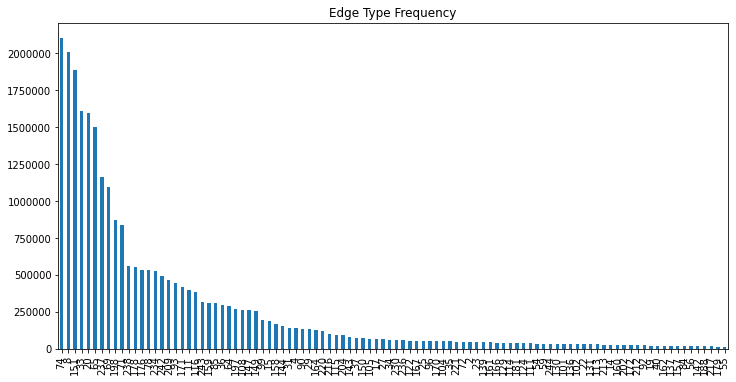

In [6]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(12, 6))

edge_list['edge_type'].value_counts()[:100].plot(
    kind='bar', ax=ax, title="Edge Type Frequency"
)

for axis in [ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

### Top 10 Edge Types

In [7]:
top_10_edge_type = list(edge_list['edge_type'].value_counts()[:10].index)
top_10_edge_type

['74', '8', '151', '33', '20', '65', '237', '69', '198', '71']

In [8]:
top_10_edge_list = edge_list[edge_list['edge_type'].isin(top_10_edge_type)]
print(f"{len(top_10_edge_list)}/{len(edge_list)}={int(len(top_10_edge_list))/int(len(edge_list))}")
top_10_edge_list.head()

14665346/27045268=0.5422518275655468


,src_id,dst_id,edge_type,timestamp,datetime,date
904,28905,5776,33,1413662400,20141019_050000,20141019
903,28905,5502,69,1413662400,20141019_050000,20141019
902,28905,5450,237,1413662400,20141019_050000,20141019
899,28905,2352,8,1413662400,20141019_050000,20141019
898,28905,106,151,1413662400,20141019_050000,20141019


In [9]:
top_10_edge_type_daily_count = top_10_edge_list \
                                    .groupby(['date', 'edge_type']).size() \
                                    .reset_index(name='count') \
                                    .sort_values(['date', 'count'], ascending=[True, False])

top_10_edge_type_daily_count.head(10)

,date,edge_type,count
8,20141019,74,1466
9,20141019,8,1287
0,20141019,151,1229
2,20141019,20,1081
4,20141019,33,1059
5,20141019,65,1043
6,20141019,69,788
1,20141019,198,668
3,20141019,237,642
7,20141019,71,587


In [10]:
# top_10_edge_type = list(edge_list['edge_type'].value_counts()[:10].index)
# top_10_edge_list = edge_list[edge_list['edge_type'].isin(top_10_edge_type)]
# top_10_edge_list_count = top_10_edge_list.groupby(['date', 'edge_type'])
# top_10_edge_list_count = top_10_edge_list_count.size().reset_index(name='count')
# top_10_edge_list_count.head()

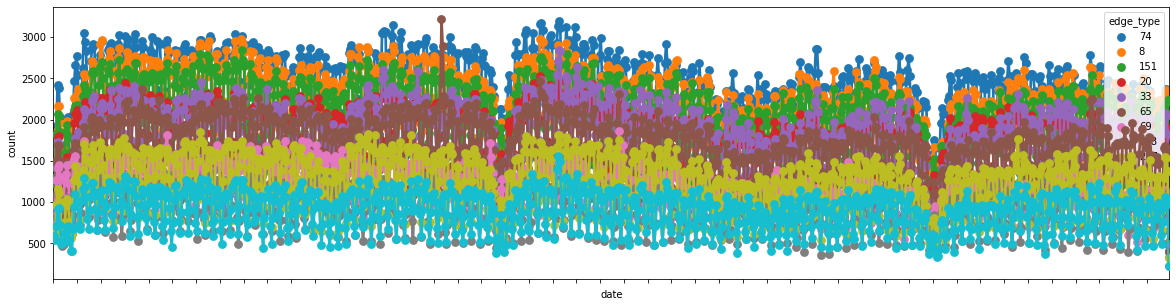

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))

sns.pointplot(
    x='date',
    y='count',
    hue='edge_type',
    # dashes= False,
    # marker='^',
    # color='pastel',
    # alpha=0.8,
    ax=axes,
    # data=data,
    data=top_10_edge_type_daily_count,
)

start, end = axes.get_xlim()
axes.xaxis.set_ticks(np.arange(start, end, 20))
for tick in axes.get_xticklabels():
    tick.set_rotation(90)

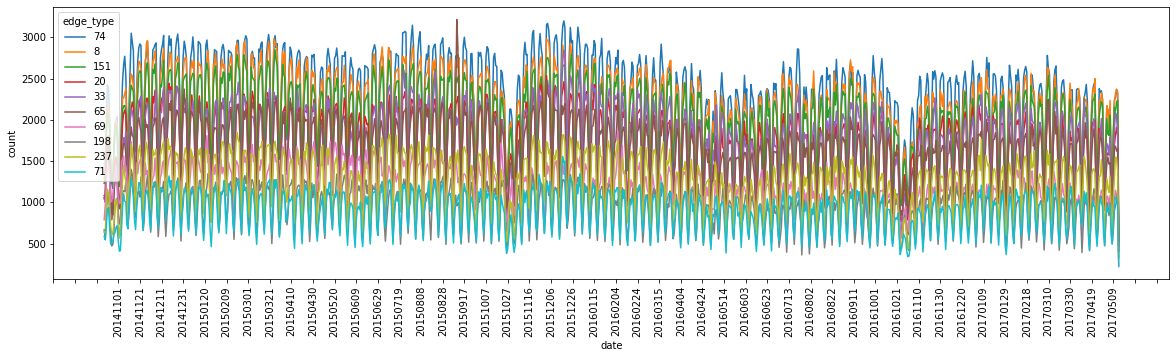

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))

sns.lineplot(
    x='date',
    y='count',
    hue='edge_type',
    # dashes= False,
    # marker='^',
    # color='pastel',
    # alpha=0.8,
    ax=axes,
    # data=data,
    data=top_10_edge_type_daily_count,
)

start, end = axes.get_xlim()
axes.xaxis.set_ticks(np.arange(start, end, 20))
for tick in axes.get_xticklabels():
    tick.set_rotation(90)